In [1]:
%matplotlib inline
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np
import pandas as pd
import networkx as nx
from math import sin, cos, sqrt, atan2, radians
from employeeNet import *
import sys
sys.path.insert(0,'./..')
from anonymisationTools import *
#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24


Bad key "text.kerning_factor" on line 4 in
C:\Users\davie\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

# Base Employees Net

In [2]:
def buildNamedBusinessGraph(data):
    G = nx.Graph()
    names = data.keys()
    for k,i in enumerate(names): G.add_node(i)
        
    for name1 in names:
        for name2 in names:
            if name1 != name2 and len(list(set(data[name1]) & set(data[name2]))):
                G.add_edge(name1,name2)
    
    labels={}
    for k,i in enumerate(names): labels[i] = i
    return G, labels

def buildBusinessGraph(data):
    G = nx.Graph()
    names = data.keys()
    businesses = list(Counter([item for sublist in data.values() for item in sublist]).keys())
    
    businessMembers = defaultdict(list)
    for b in businesses:
        for name in names:
            if b in data[name]:
                businessMembers[b].append(name)
            
    businessList = businessMembers.keys()
    for k,i in enumerate(businessList): G.add_node(i)
    for b1 in businessList:
        for b2 in businessList:
            if b1 != b2 and len(list(set(businessMembers[b1]) & set(businessMembers[b2]))):
                G.add_edge(b1,b2)
    
    labels={}
    for k,i in enumerate(businessList): labels[i] = i
    return G, labels

def plotGraph(G,labels,colors=None):
    pos=nx.spring_layout(G,k=0.7)
    nx.draw(G,pos,node_color=colors)
    for label in pos:
        x,y = pos[label]
        plt.text(x,y+0.035,s=labels[label],horizontalalignment='center',fontsize=24)
    
def saveGraphToFile(G, filename):
    file_ = nx.to_numpy_matrix(G)
    print(file_.shape)
    print()
    np.savetxt(filename,file_, "%d") 

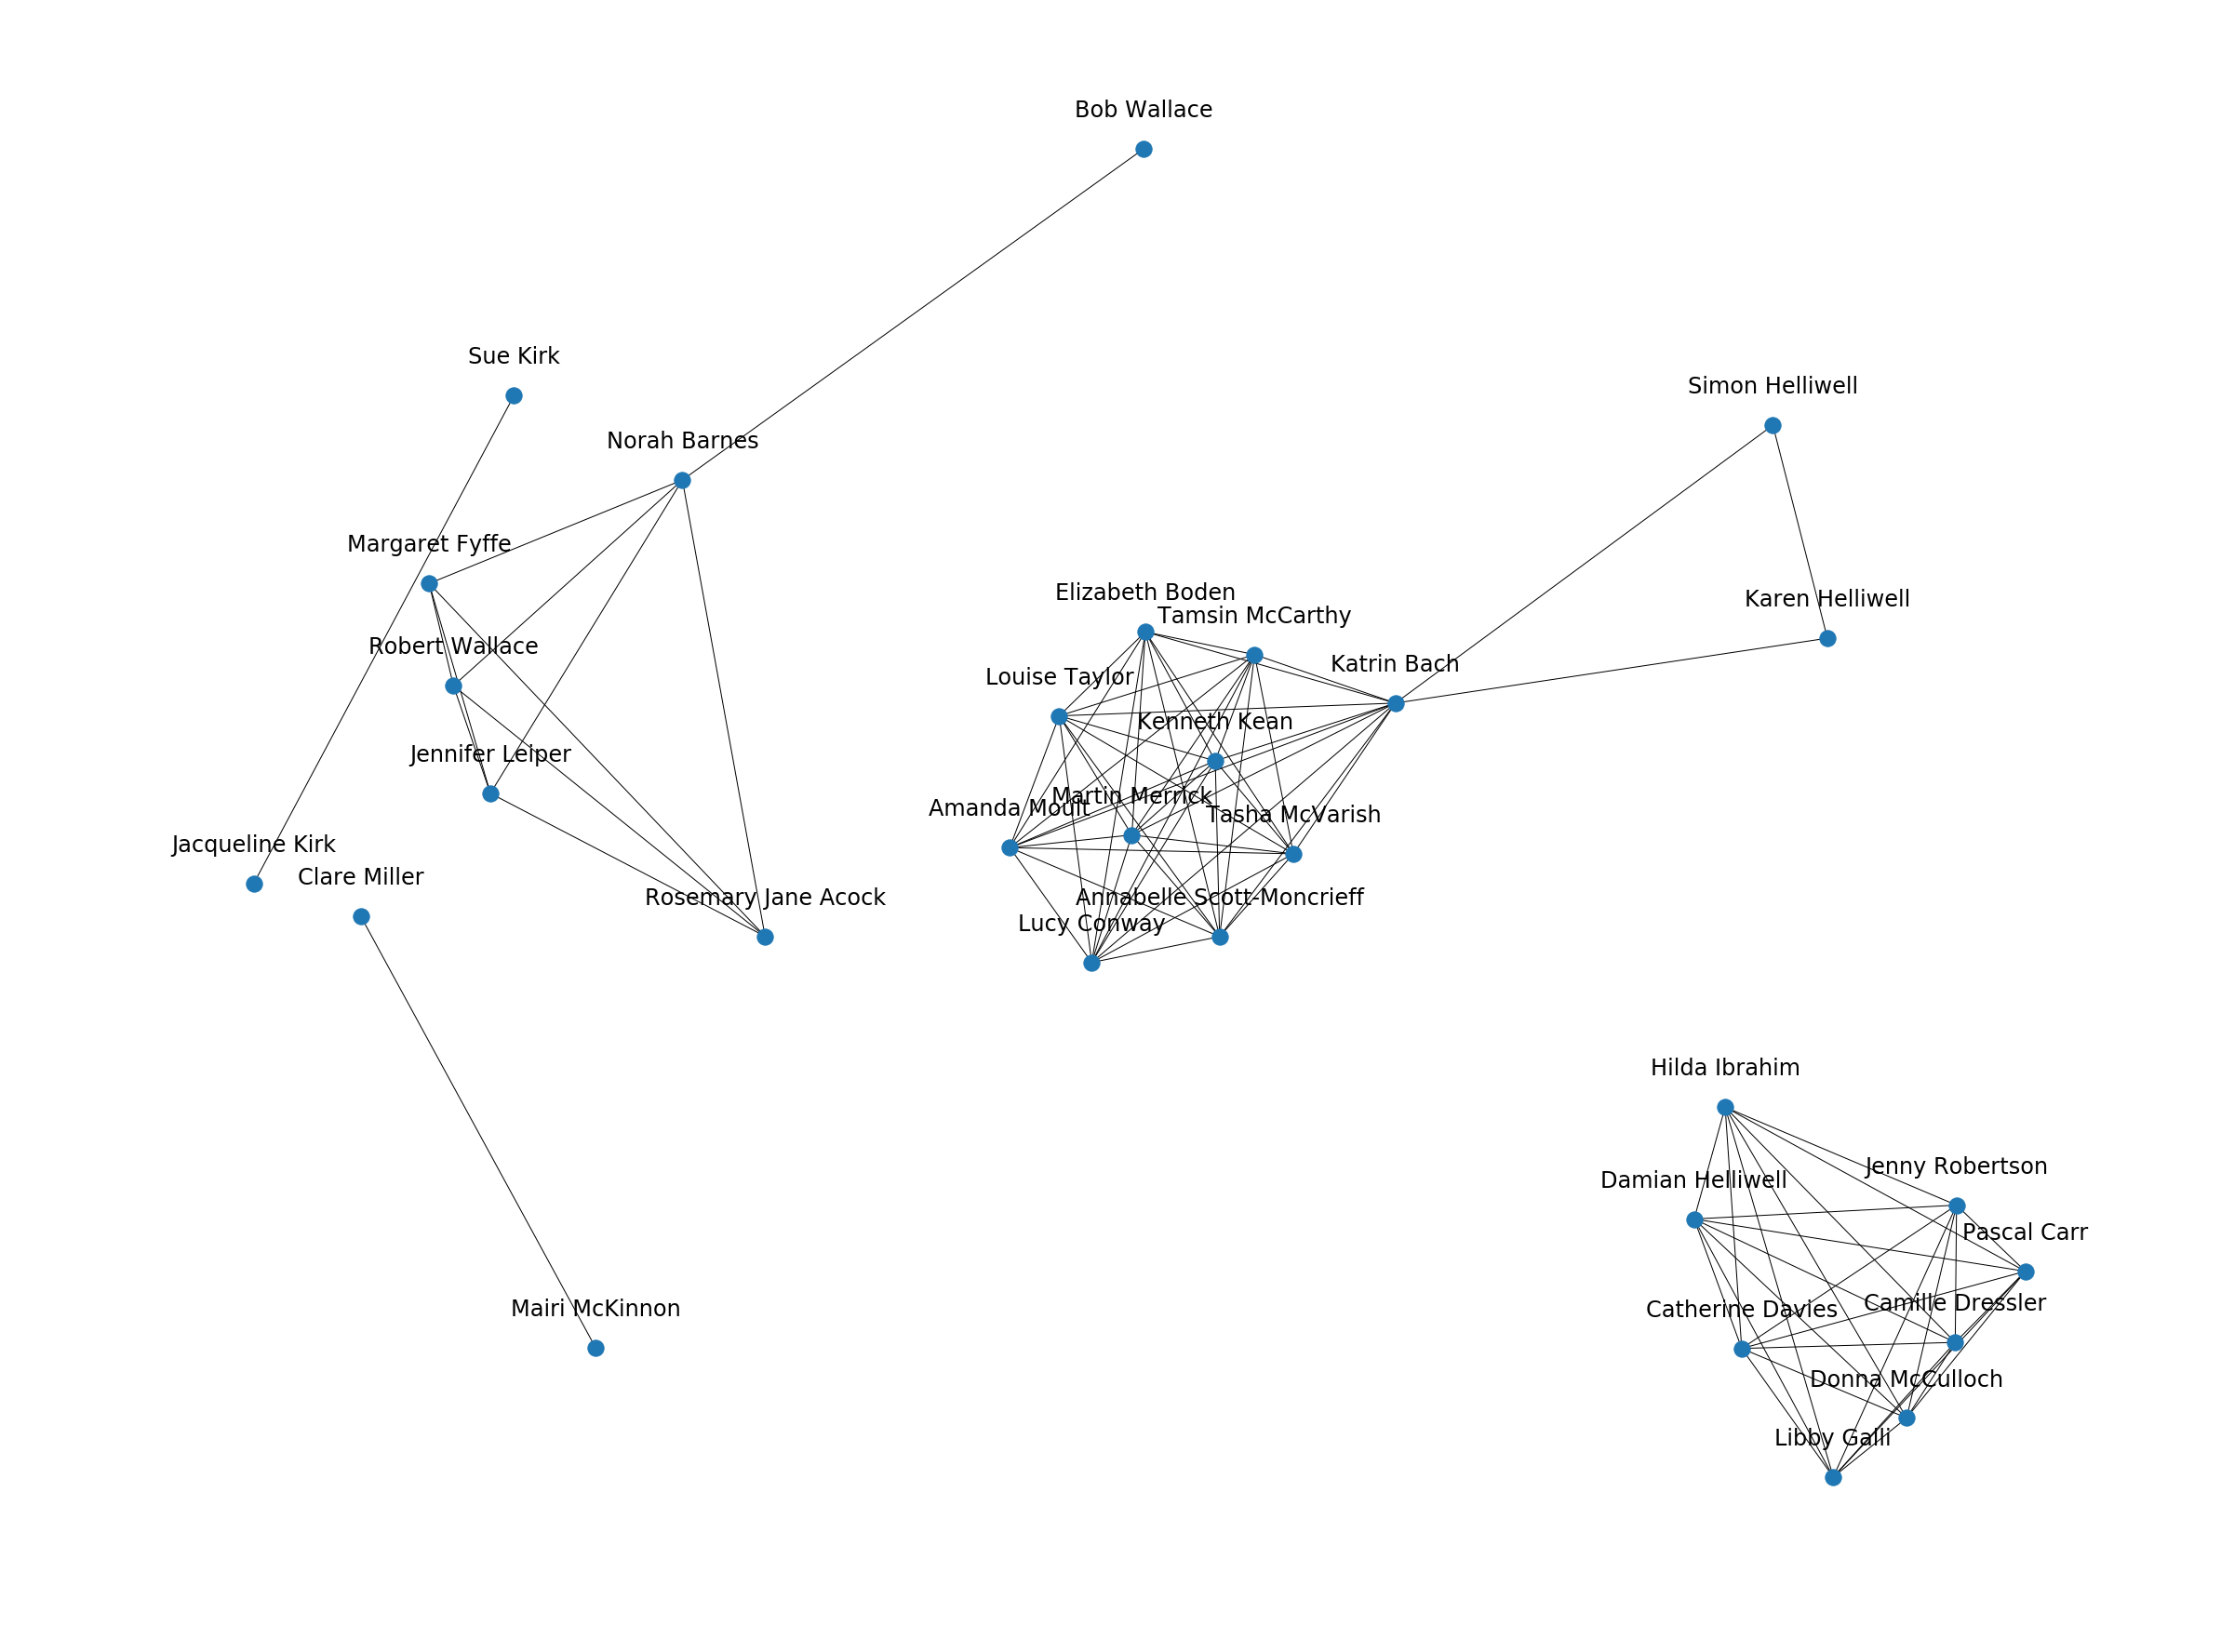

In [5]:
data = employeeGraph()
G,labels = buildNamedBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
plotGraph(G,labels)


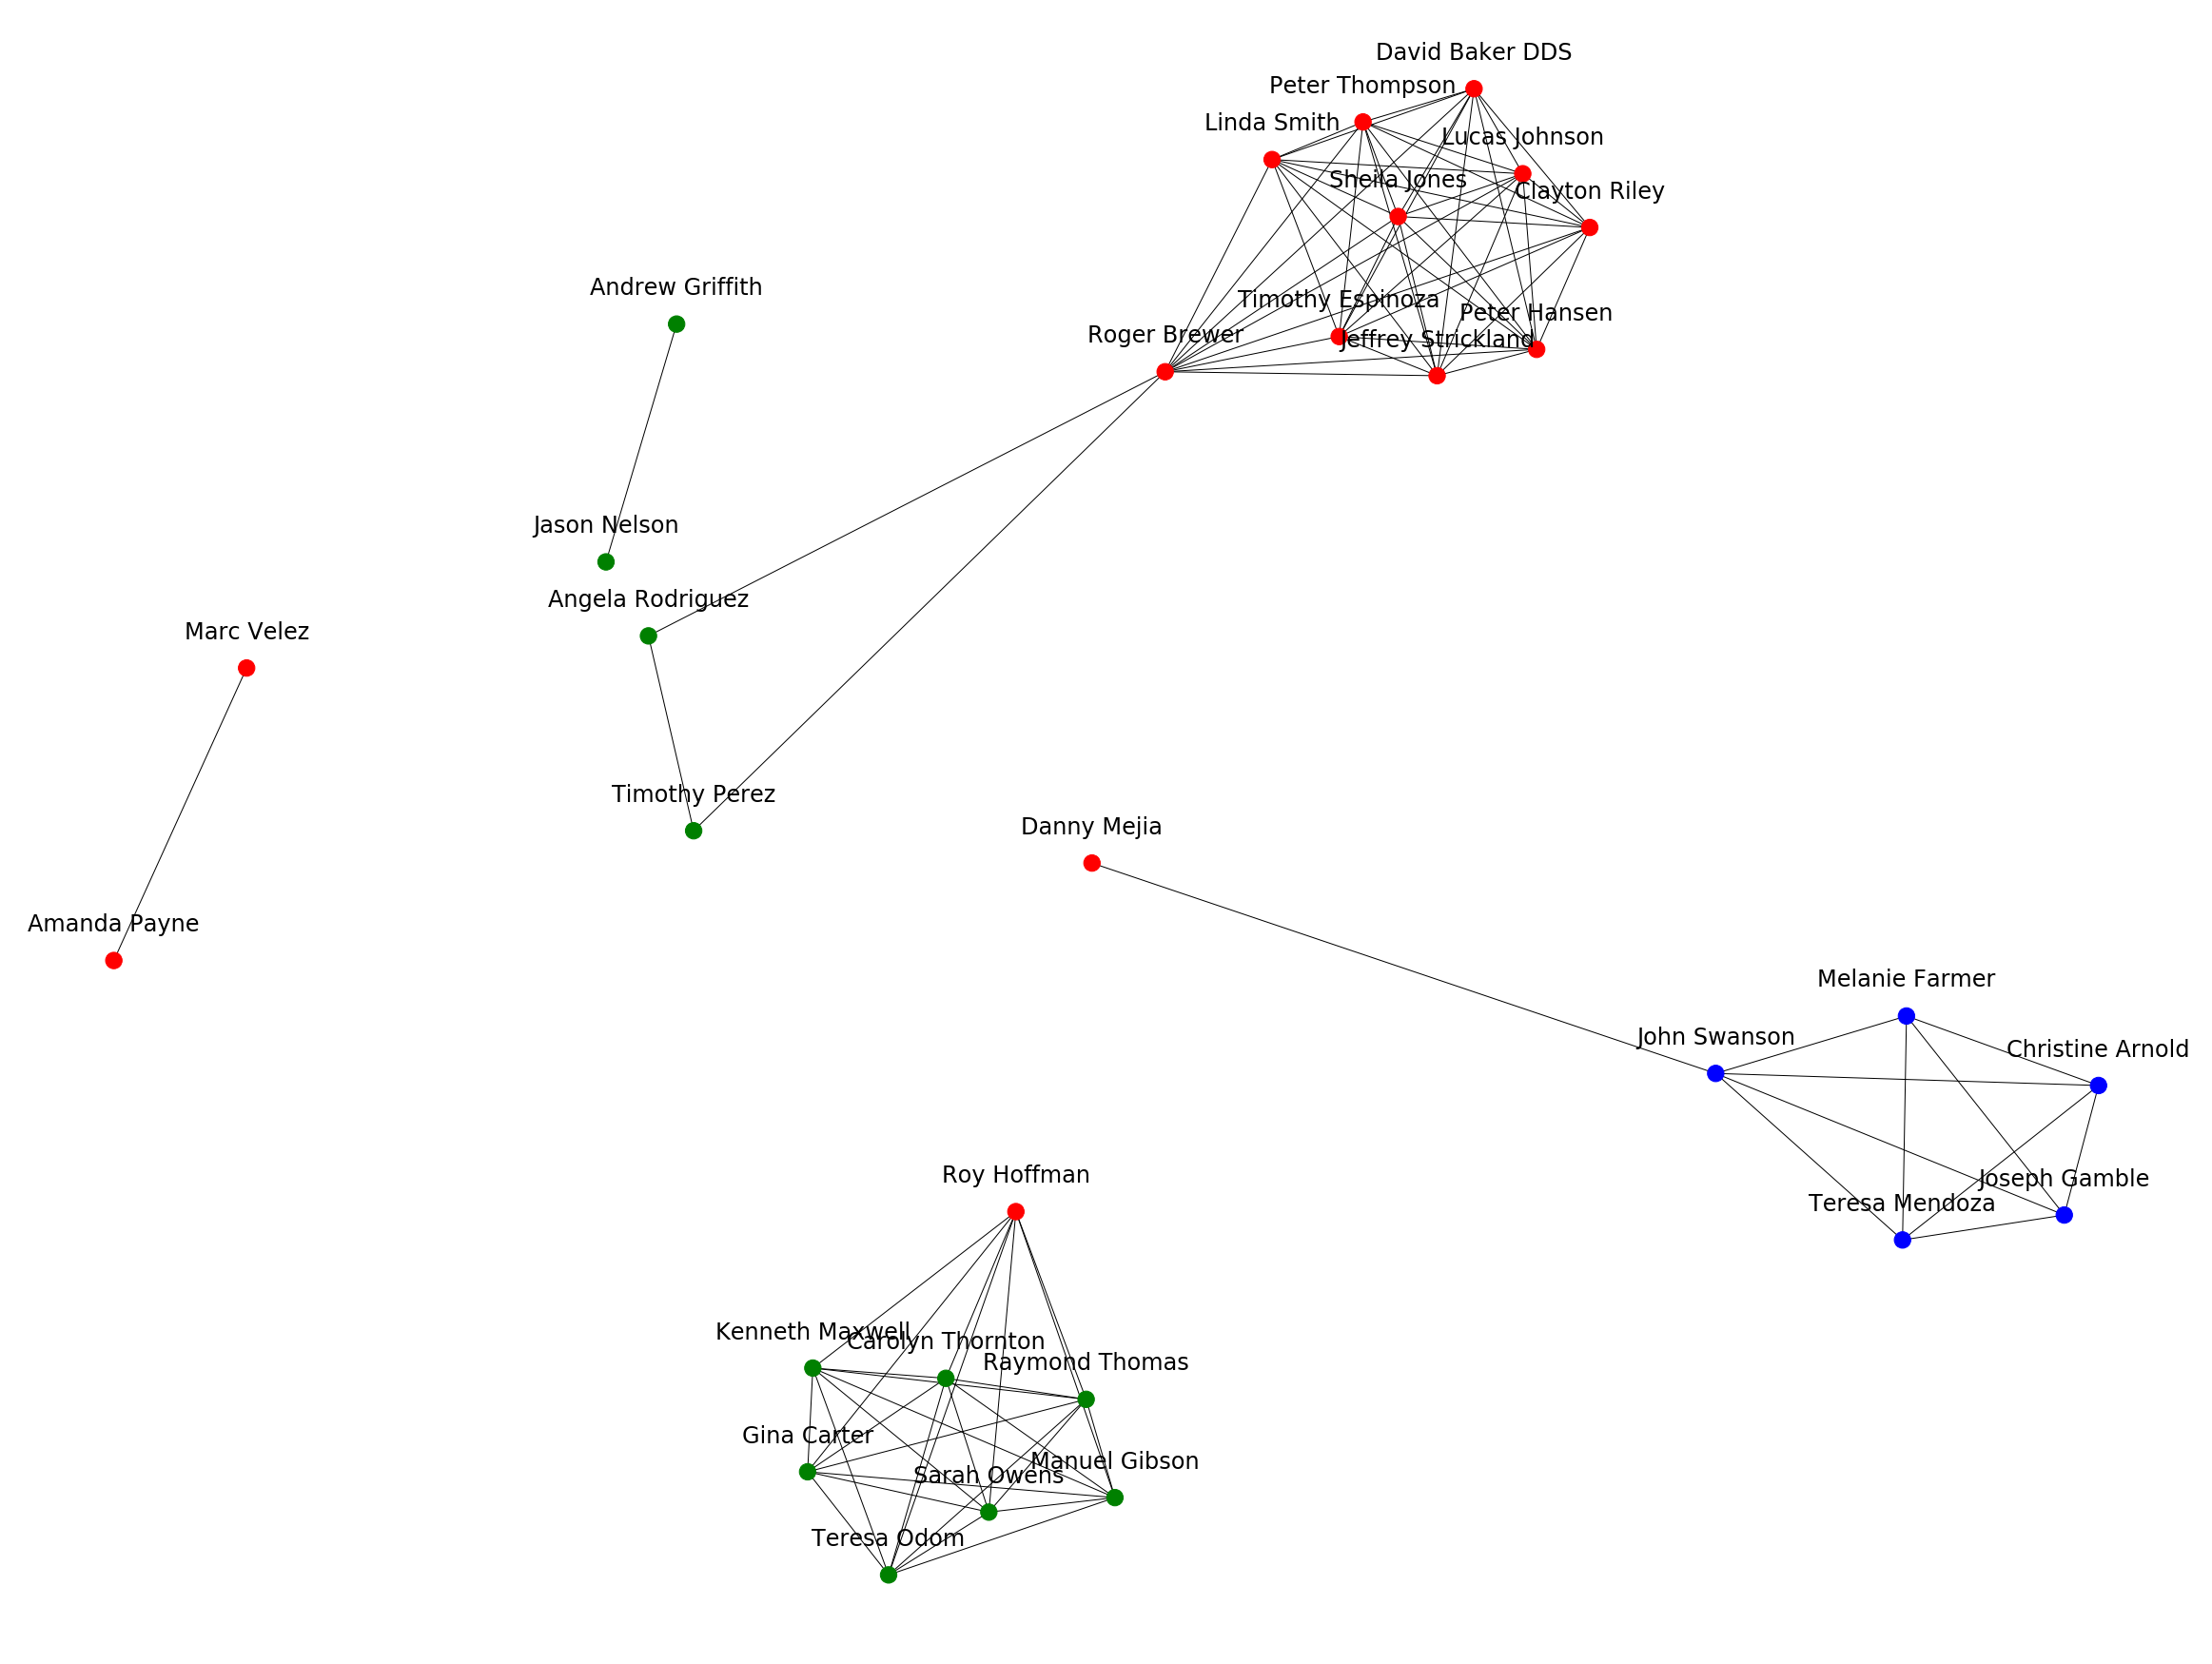

In [6]:
publicEmployees = involvedInPublicServices()
data = employeeGraph()
G,labels = buildNamedBusinessGraph(data)
labels = fakeListOfNames(labels)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
G.remove_nodes_from(["Simon Helliwell", "Karen Helliwell"])
colors = ["blue" if "Clean Planet Now" in data[x] else "red" if publicEmployees[x] == 1 else "green" for x in G.nodes()]
plotGraph(G,labels,colors)

# saveGraphToFile(G,'colouredEmployeeNets.txt')
# labelsInOrder = list(G.nodes())
# attributesInOrder = list(map(lambda x: str(int("Clean Planet Now" in data[x])) + " " + str(int(publicEmployees[x] == 0)) + " " + str(int("1" not in (str(int("Clean Planet Now" in data[x])) + " " + str(int(publicEmployees[x] == 0))))),G.nodes()))
# np.savetxt('colouredEmployeeNetsLabels.txt', labelsInOrder, '%s')
# np.savetxt('colouredEmployeeNetsAttr.txt', attributesInOrder, "%s")

# Public nets

(18, 18)



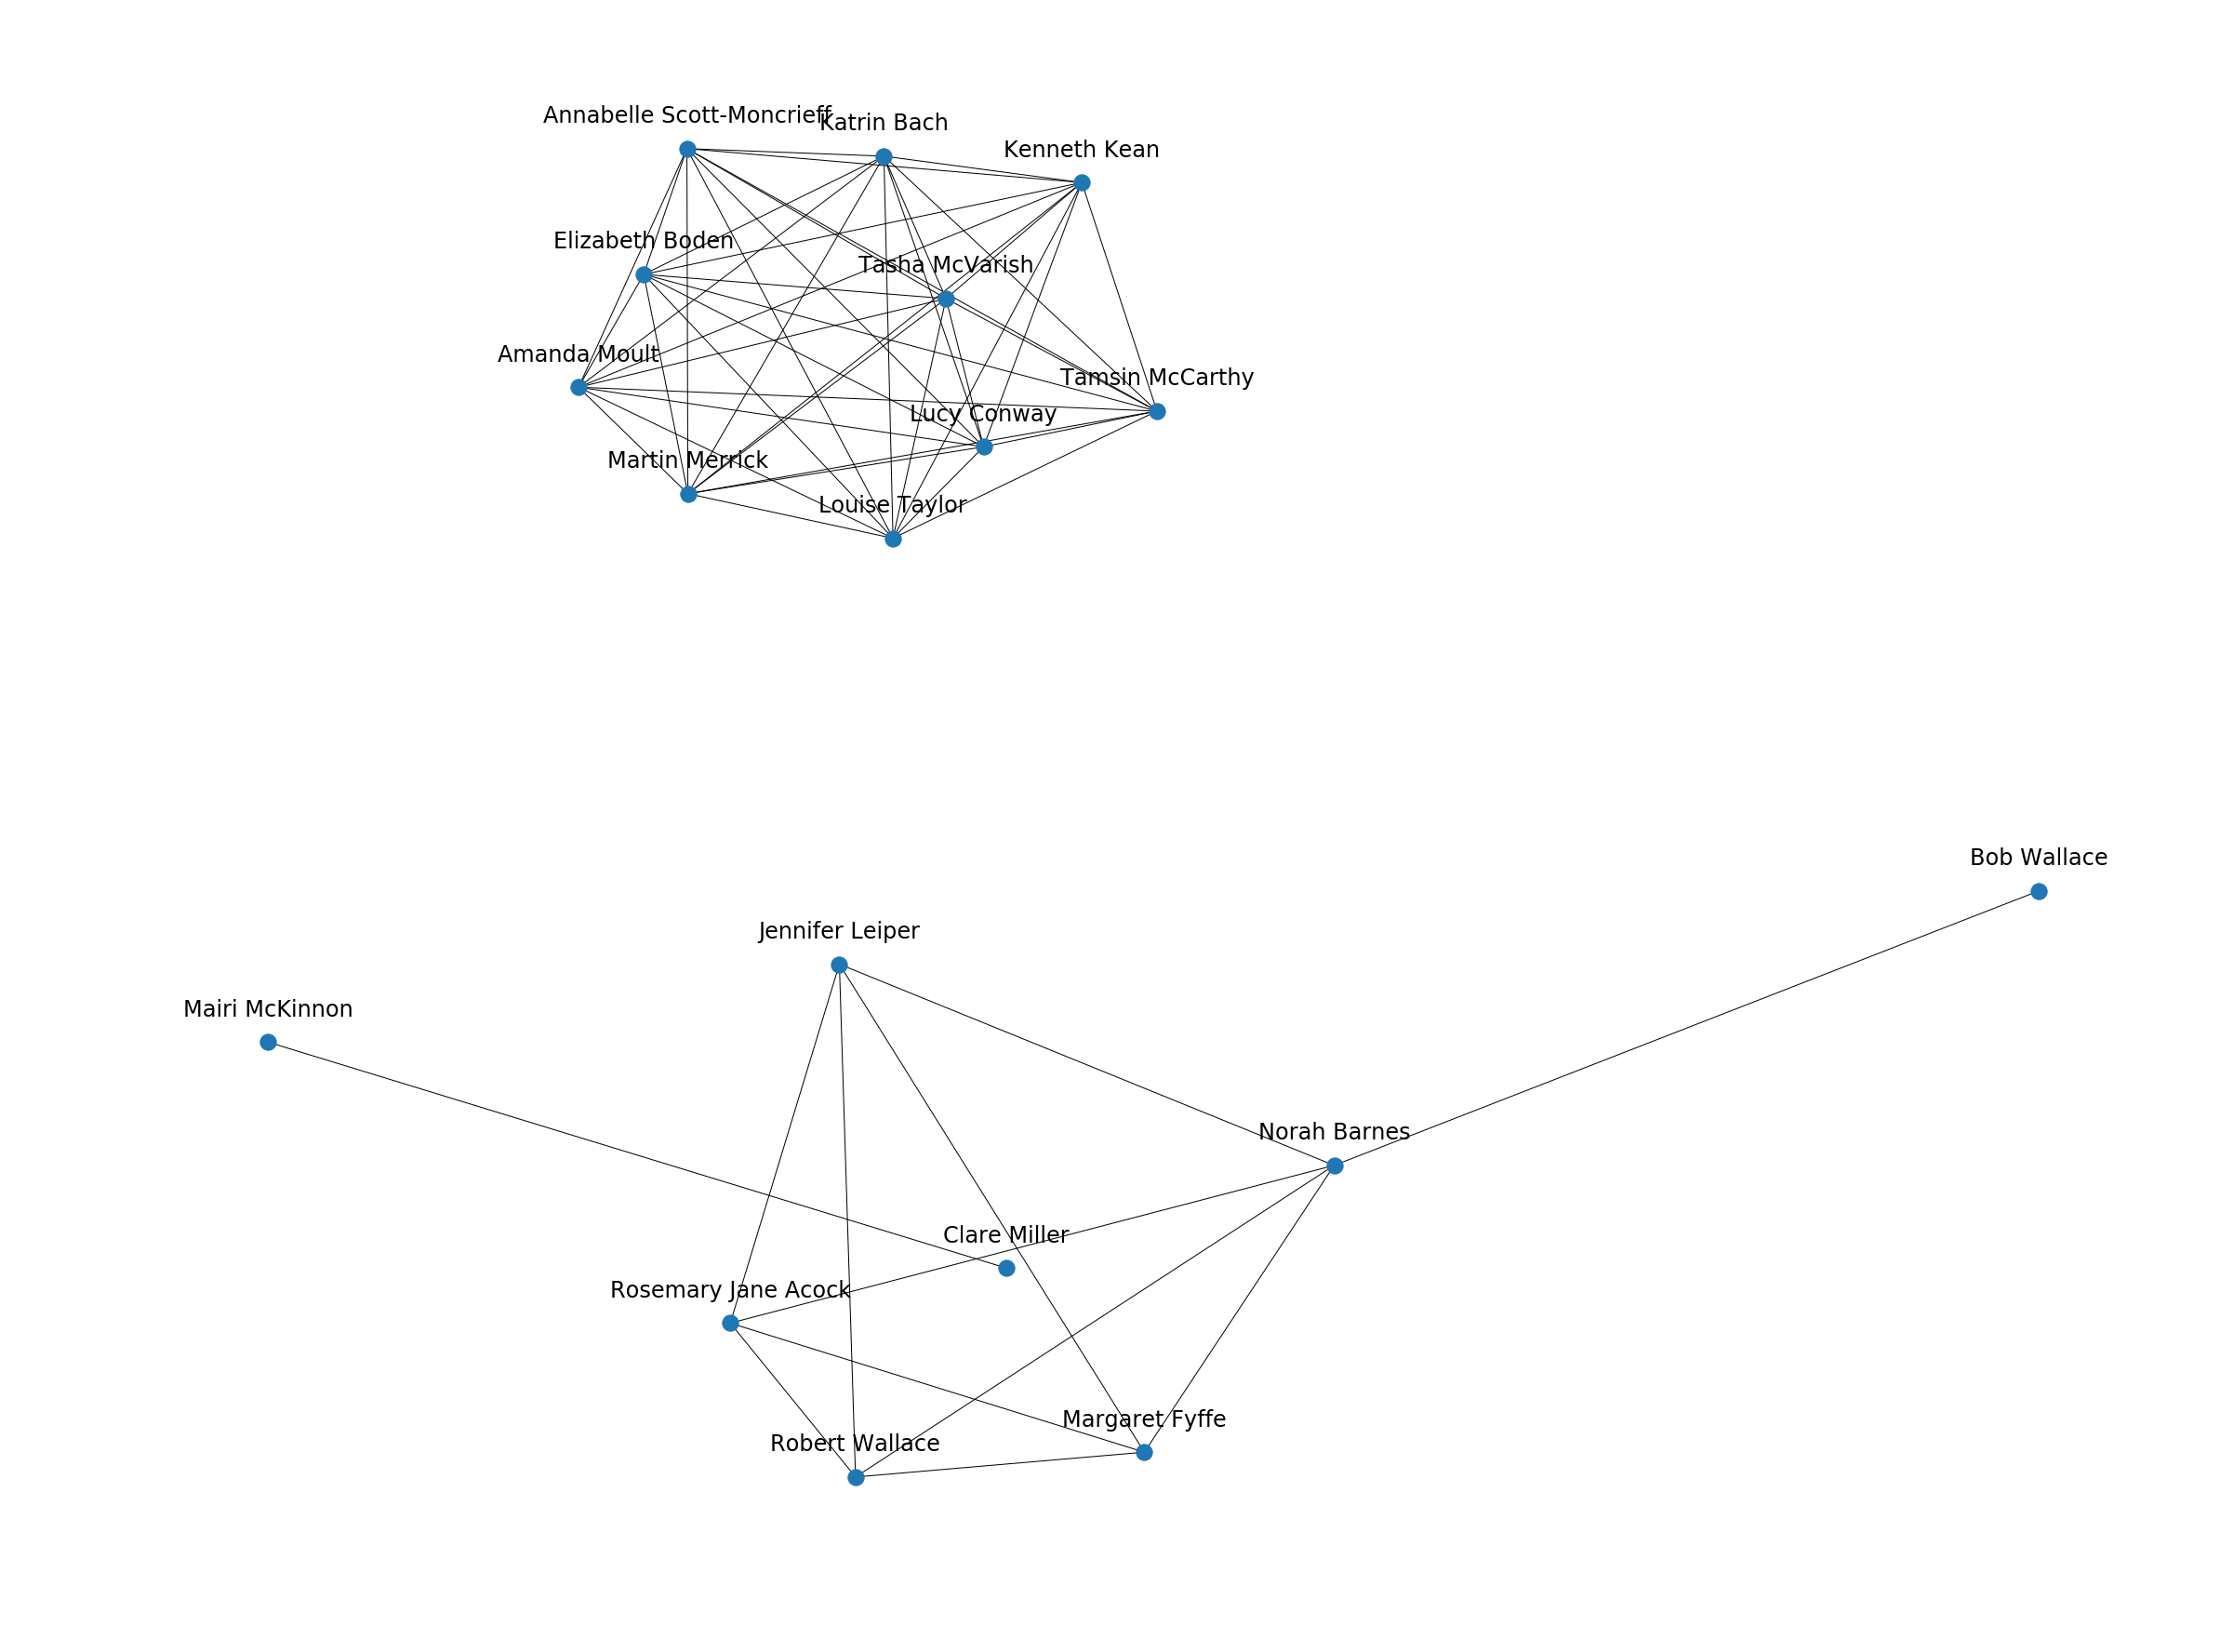

In [28]:
data = publicEmployeeNetwork()
G,labels = buildNamedBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
plotGraph(G,labels)

saveGraphToFile(G,'publicEmployees.txt')
labelsInOrder = list(G.nodes())
np.savetxt('publicEmployeesLabels.txt', labelsInOrder, '%s')

# Private Employees Networks

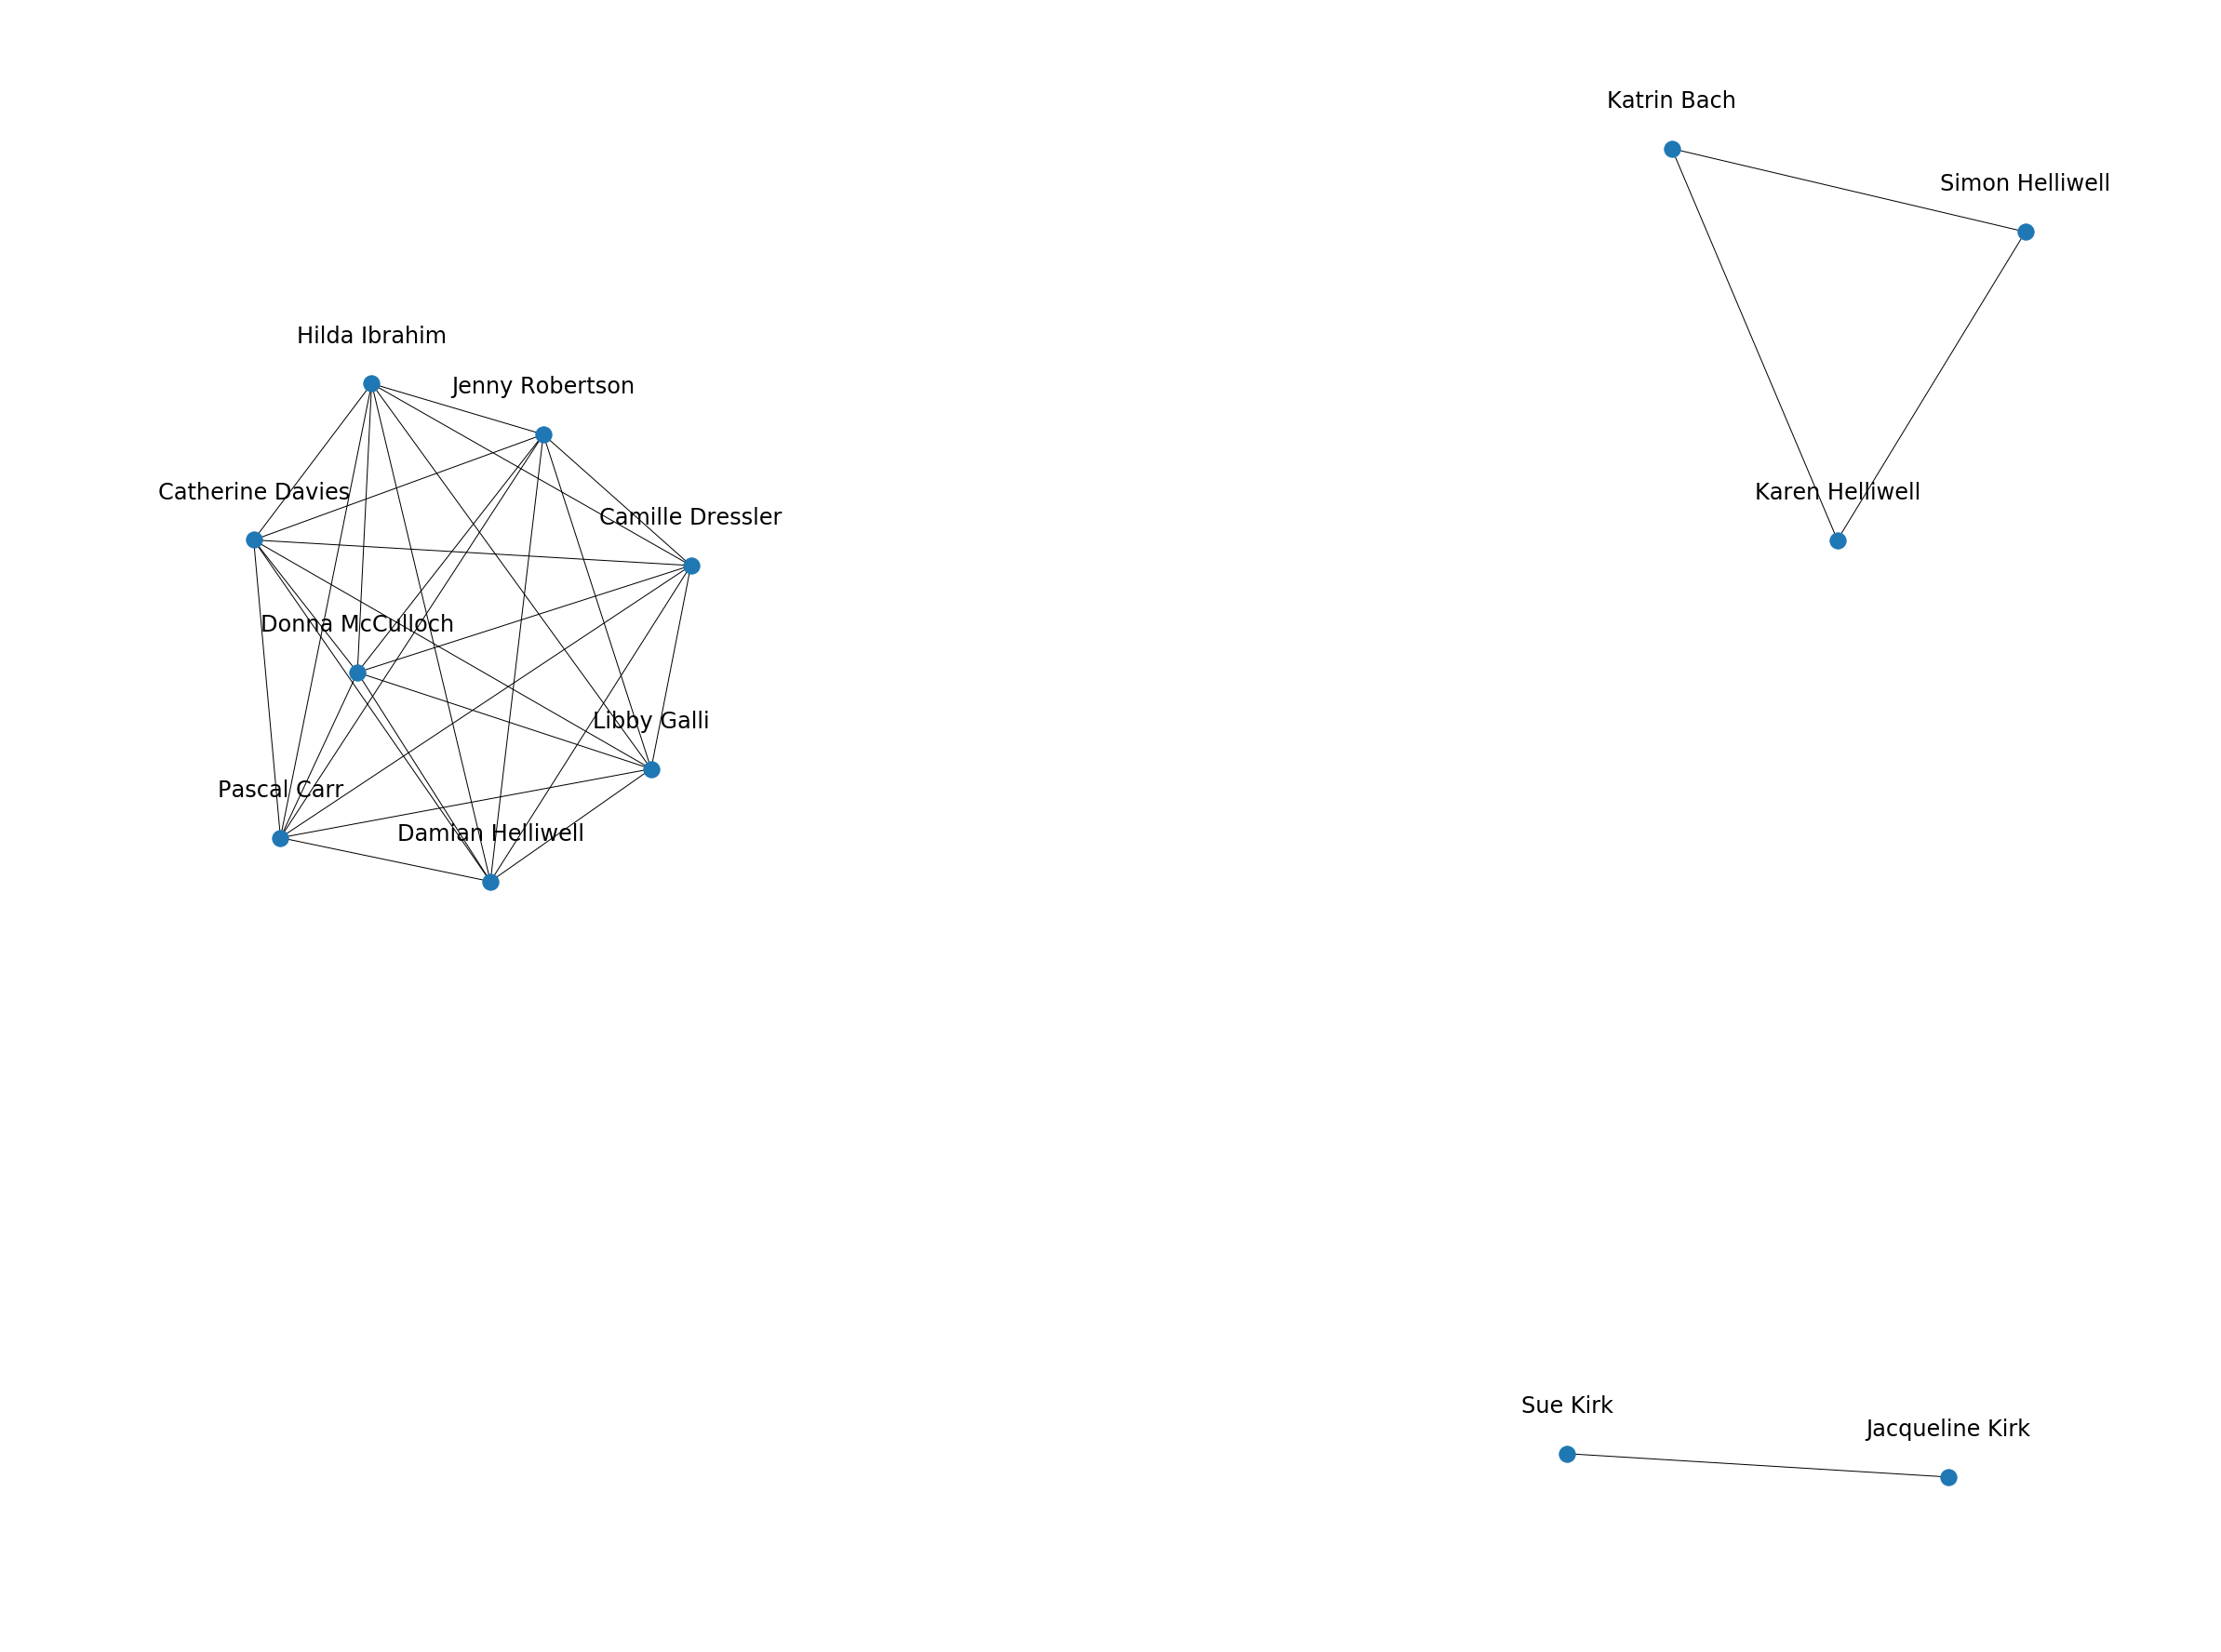

In [17]:
data = privateEmployeeNetwork()
G,labels = buildNamedBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
plotGraph(G,labels)